# Introduction to Data

In the following we will be analyising the gender distribution in each major category of college discipline. After that we will be seeing which major category has maximum unemployement percentage. In which education students are able to get a job within their discipline.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

recent_grads=pd.read_csv("recent-grads.csv")


In [32]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Data Cleaning

In [33]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [34]:
recent_grads.dropna(inplace=True)
#Dropping the following columns as they are not relevant to the analysis.
recent_grads.drop(["Rank", "Major_code", "Median", "P25th", "P75th"], axis=1, inplace=True)
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 16 columns):
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs           172 non-null int64
dtypes: float64(5), int64(9), object(2)
memory usage: 21.5+ KB


In [35]:
group_major_category = recent_grads.groupby("Major_category").sum()

group_major_category["share_women"]=group_major_category["Women"]/group_major_category["Total"]
group_major_category["share_men"]=group_major_category["Men"]/group_major_category["Total"]
group_major_category.head()

,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs,share_women,share_men
Major_category,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,75620.0,40357.0,35263.0,3.647407,1068,63794,55585,15470,41891,3486,0.466352,18677,33217,7414,0.466318,0.533682
Arts,357130.0,134390.0,222740.0,4.829264,3260,288114,207773,114791,153111,28228,0.721382,94785,163720,60116,0.623694,0.376306
Biology & Life Science,453862.0,184919.0,268943.0,8.220700,2317,302797,240377,116736,165802,22854,0.852849,151233,127182,42742,0.592566,0.407434
Business,1302376.0,667852.0,634524.0,6.281573,15505,1088742,988870,196936,790425,79877,0.923826,148538,496570,126788,0.487205,0.512795
Communications & Journalism,392601.0,131921.0,260680.0,2.633536,4508,330660,273330,89817,214228,26852,0.302151,86556,172992,49595,0.663982,0.336018


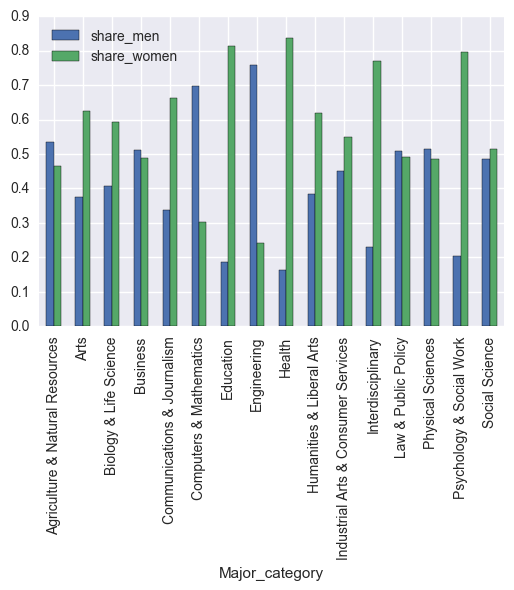

In [36]:
group_major_category[["share_men","share_women"]].plot(kind="bar")
plt.show()

# Gender Distribution according to Major Category

Category with 
gender equality : Agriculture and Natural Resources, Business, Law & Public Policy, Physical Sciences, Social Science
Male > Females : Computers and Mathematics, Engineering
Females > Males : Arts, Biology and LIfe Science, Communications and Journalism, Education, Health, Humanities and Liberal Arts, Interdisciplinary, Psychology and Social Work


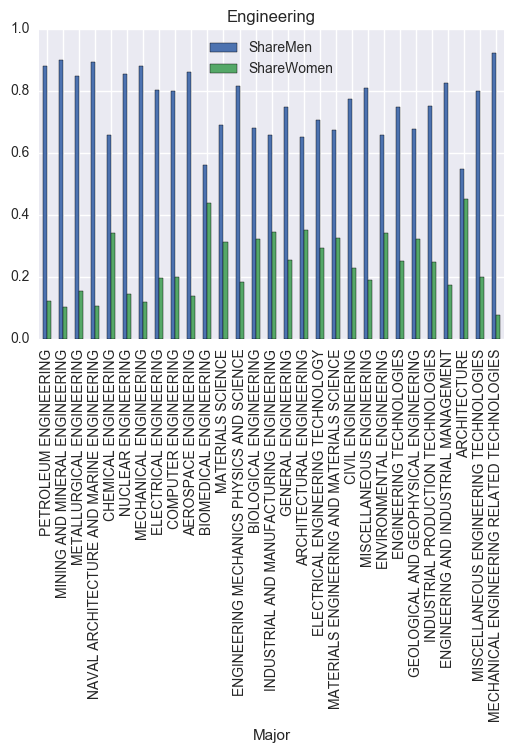

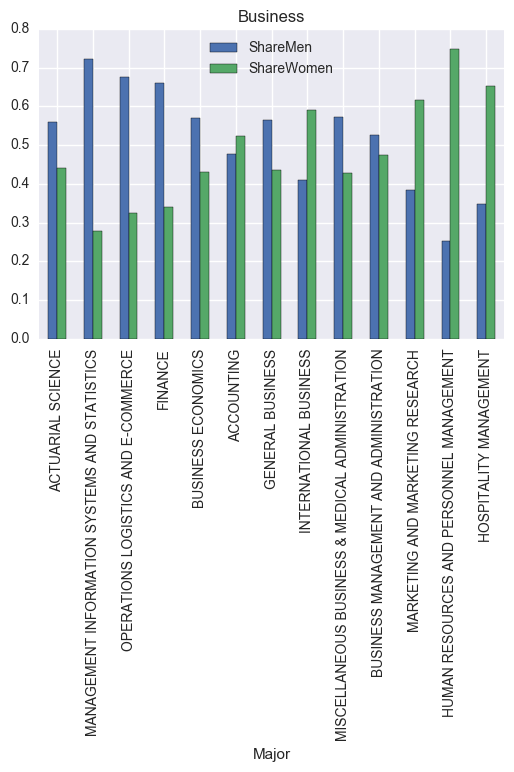

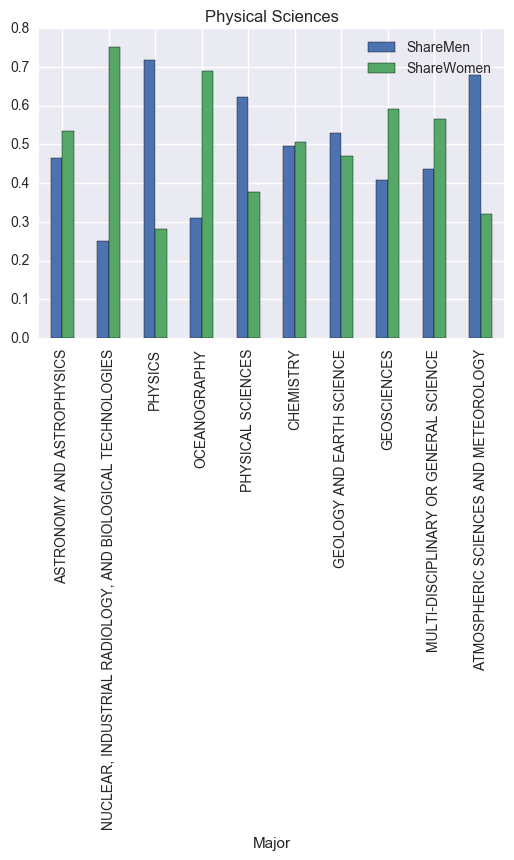

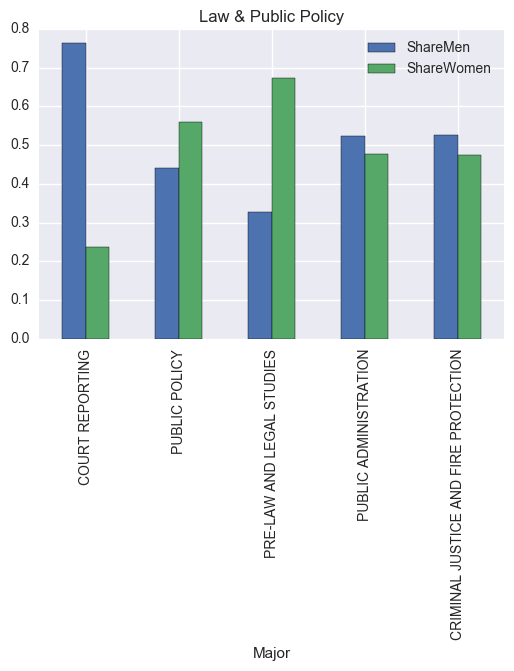

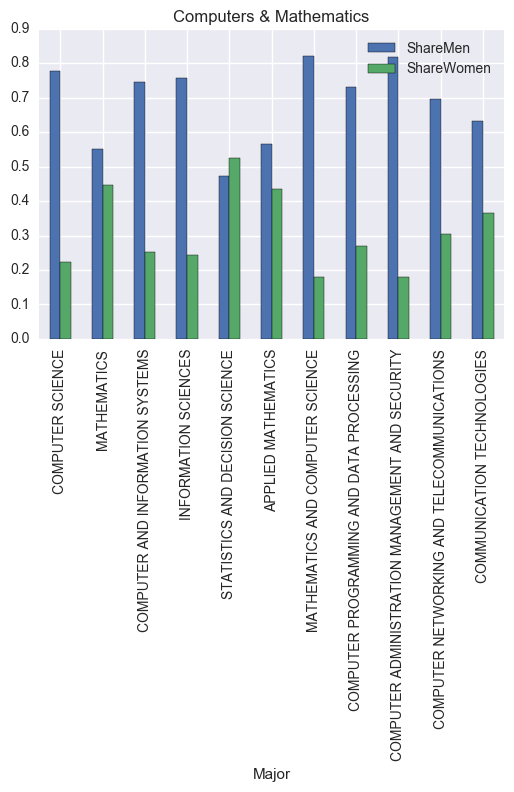

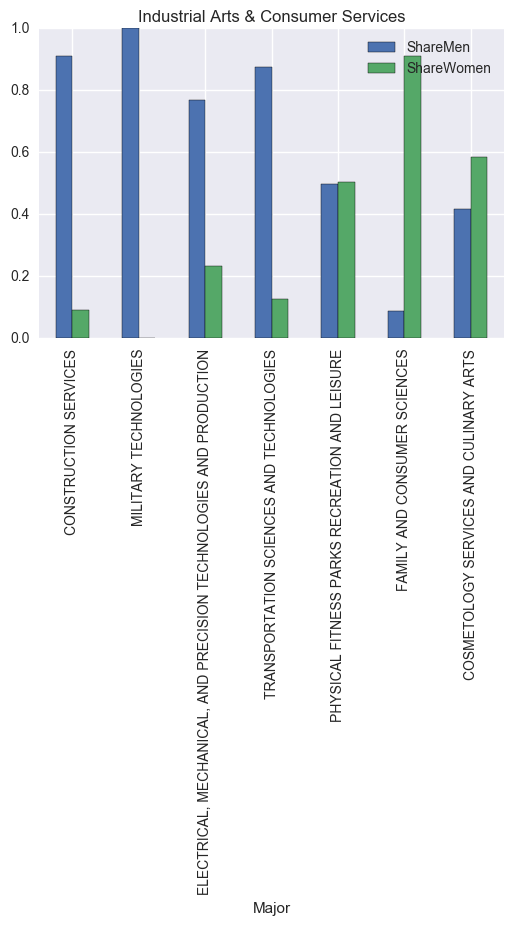

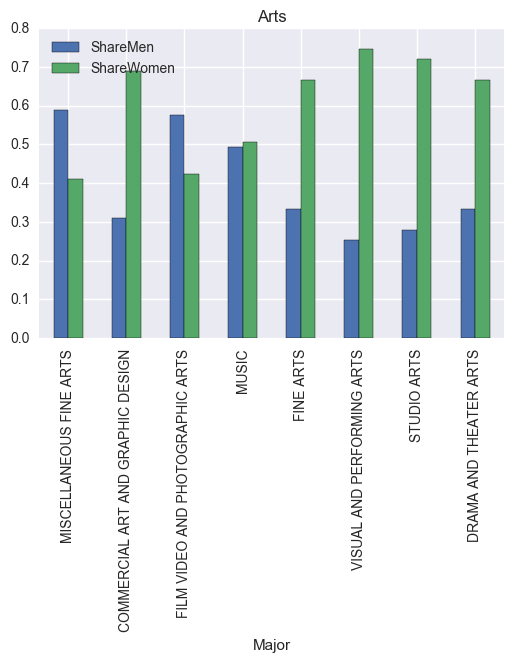

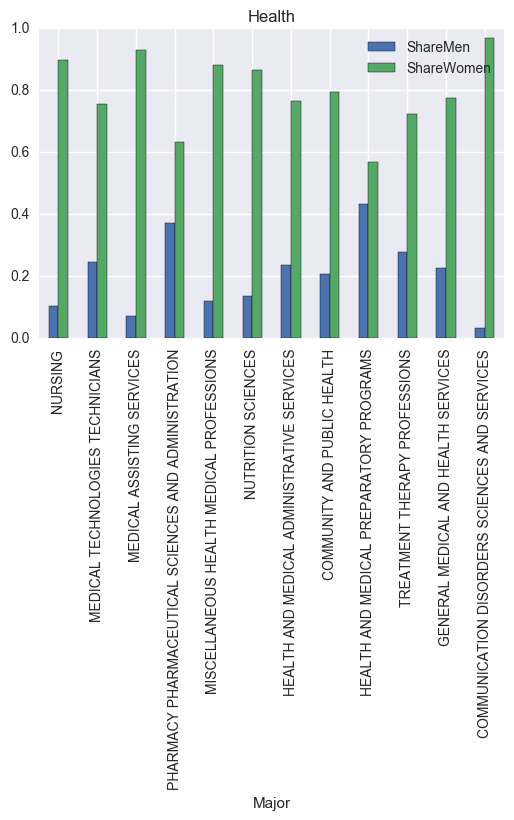

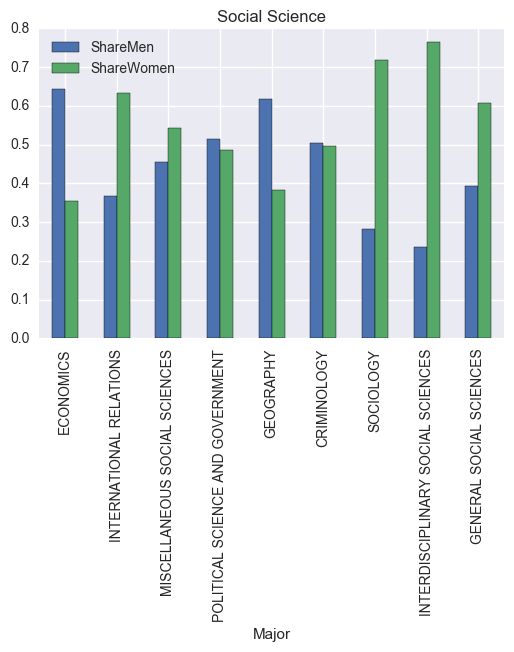

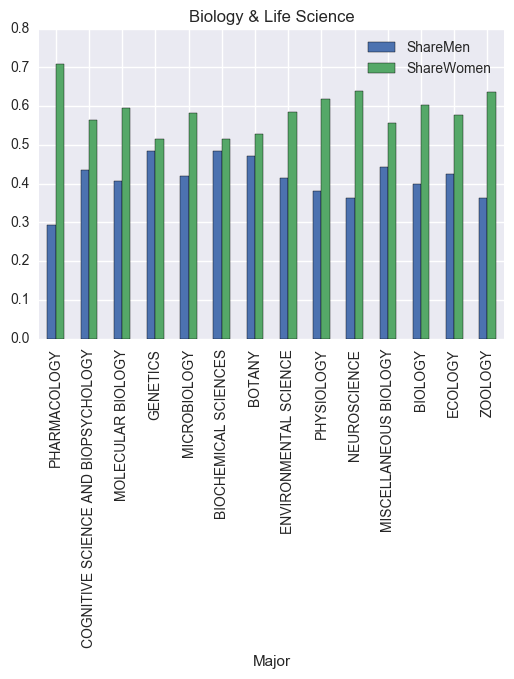

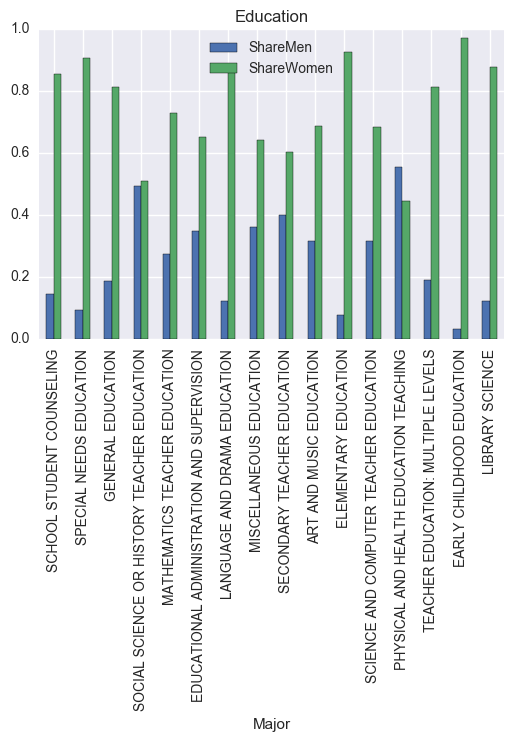

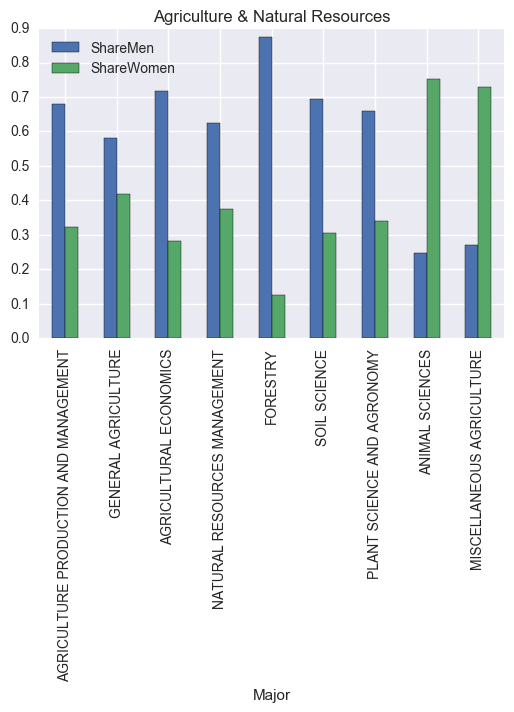

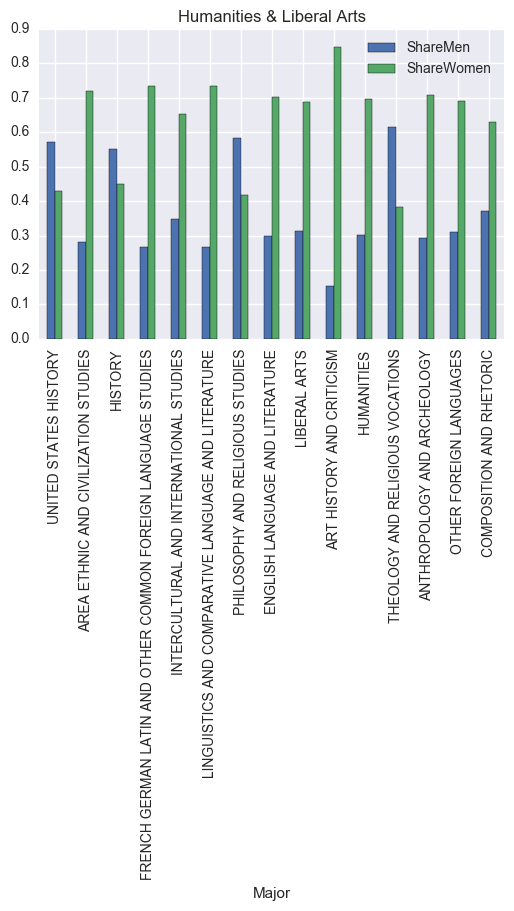

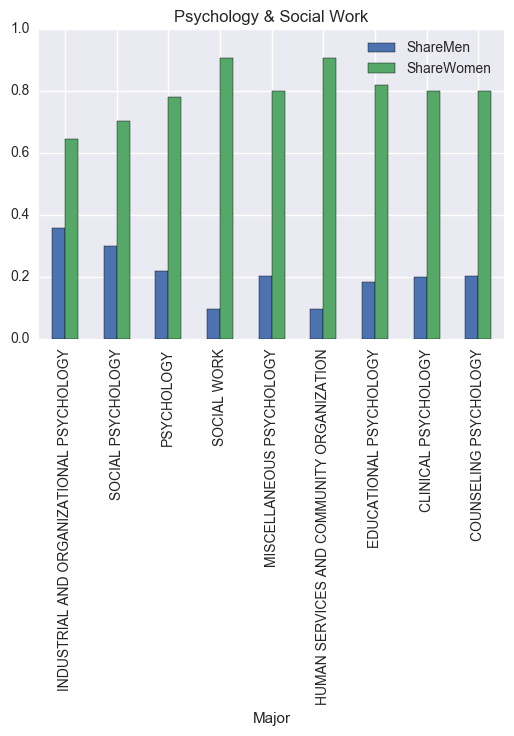

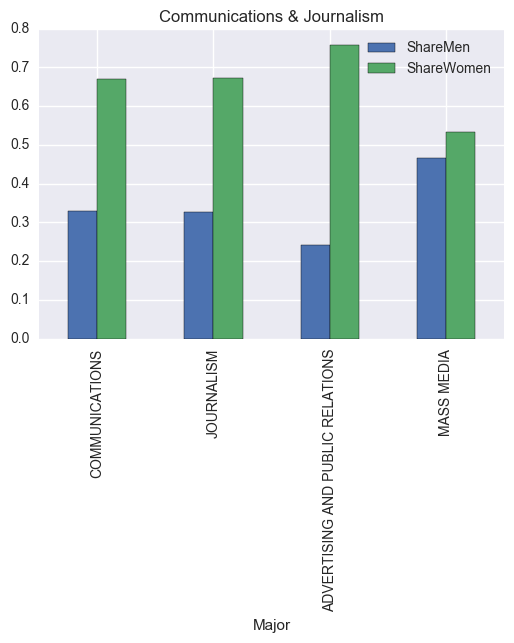

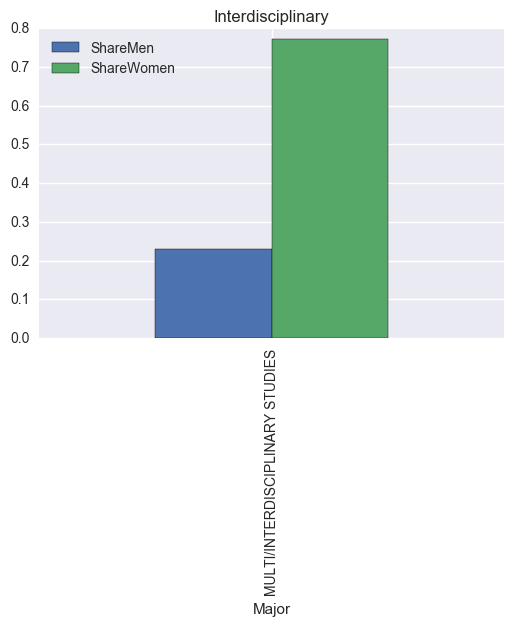

In [37]:
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
major_category_unique = recent_grads["Major_category"].unique()
for category in major_category_unique:
    df_category = recent_grads[recent_grads["Major_category"] == category]
    df_category.set_index("Major", inplace=True)
    df_category[["ShareMen", "ShareWomen"]].plot(kind="bar")
    plt.title(category)

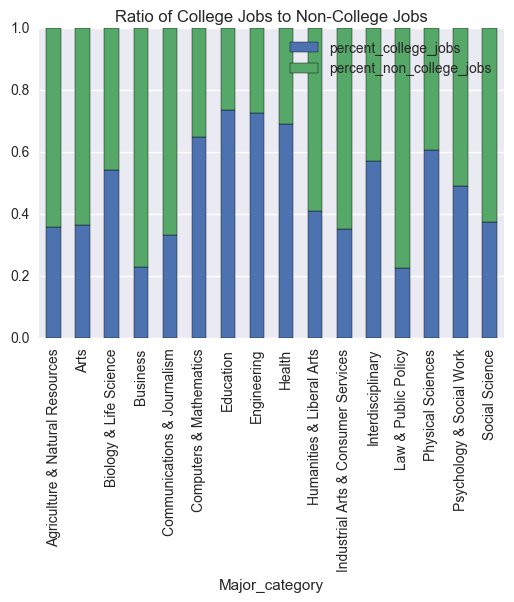

In [38]:
group_major_category["percent_college_jobs"]=group_major_category["College_jobs"] /(group_major_category["College_jobs"]+group_major_category["Non_college_jobs"])
group_major_category["percent_non_college_jobs"]= 1 - group_major_category["percent_college_jobs"]
group_major_category[["percent_college_jobs","percent_non_college_jobs"]].plot(kind="bar",stacked=True)
plt.title("Ratio of College Jobs to Non-College Jobs")
plt.show()



# College Jobs vs Non College Jobs
Category with College Jobs > Non-College Jobs : Computers and Mathematics, Education, Engineering, Health
Category with Non-College Jobs > College Jobs : Business, Law and Public Policy

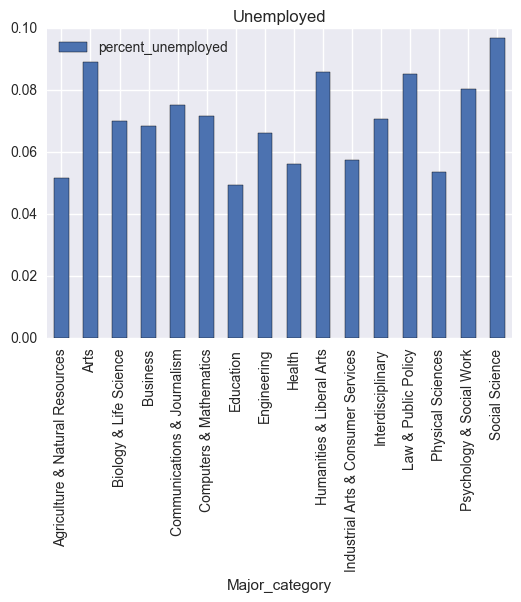

In [39]:

group_major_category["percent_employed"]=group_major_category["Employed"] /(group_major_category["Employed"]+group_major_category["Unemployed"])
group_major_category["percent_unemployed"]= 1 - group_major_category["percent_employed"]
group_major_category[["percent_unemployed"]].plot(kind="bar")
plt.title("Unemployed")
plt.show()

# Unemployment
Disciplines with relatively highest unemployment are: Arts, Humanities and Liberal Arts, Law and Public Policy, Social Science

# Data Visualisation Assignment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09B9B770>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0A8B55F0>]], dtype=object)

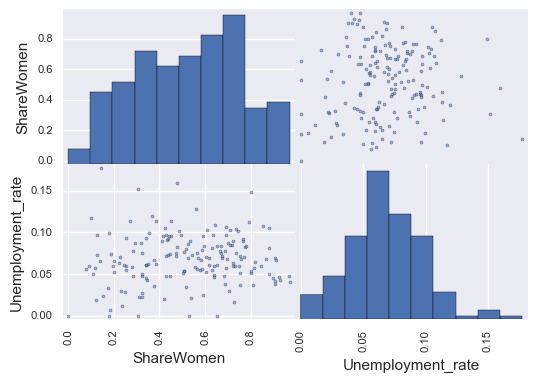

In [40]:
# Scatter plot that Pandas generates
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])

# Scatter Matrix Step 1

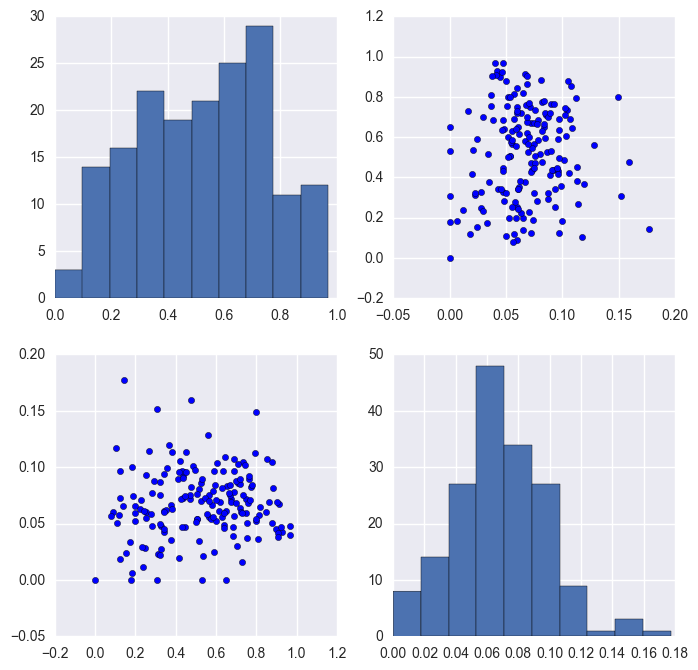

In [41]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,8))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

plt.show()

# Scatter Matrix Step 2 and 3

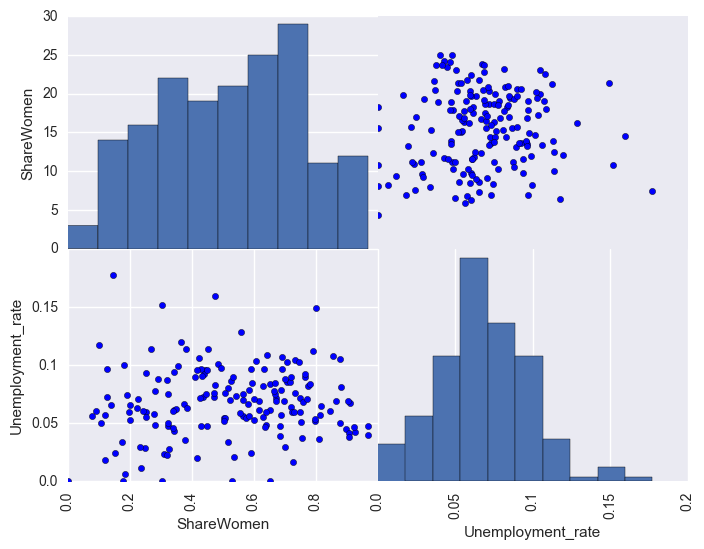

In [42]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,6))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])
# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

# Top left plot
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()
ax1_rg.set_ylim(0,30)
ax1_rg.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

# Top right plot
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)
ax2_rg.set_xlim(0.0, 0.20)

# Bottom left plot
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()
ax3_rg.set_ylim(0.00, 0.20)
ax3_rg.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

# Bottom right plot
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)
ax4_rg.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Grouped Bar Plots, part 1

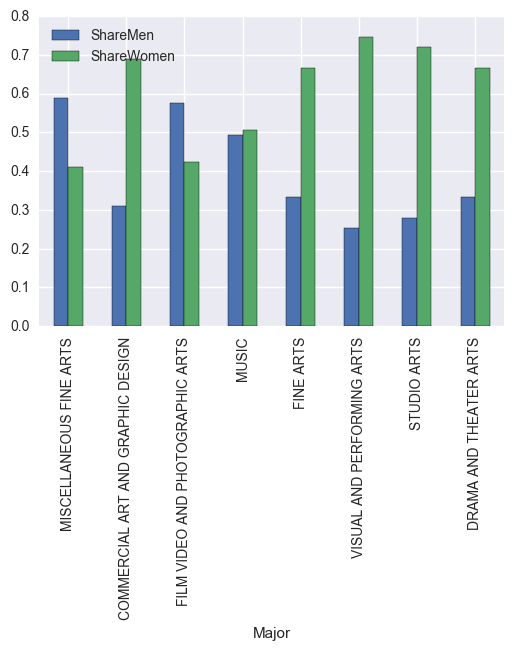

In [43]:
# Pandas generated grouped bar plot
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")

,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
Major,,,,,,,,,,,,,,,,
MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,2049,1067,1200,286,0.089375,693,1714,755,0.589820
COMMERCIAL ART AND GRAPHIC DESIGN,103480.0,32041.0,71439.0,Arts,0.690365,1186,83483,67448,24387,52243,8947,0.096798,37389,38119,14839,0.309635
FILM VIDEO AND PHOTOGRAPHIC ARTS,38761.0,22357.0,16404.0,Arts,0.423209,331,31433,22457,12818,15740,3718,0.105772,7368,20721,5862,0.576791
MUSIC,60633.0,29909.0,30724.0,Arts,0.506721,419,47662,29010,24943,21425,3918,0.075960,13752,28786,9286,0.493279
FINE ARTS,74440.0,24786.0,49654.0,Arts,0.667034,623,59679,42764,23656,31877,5486,0.084186,20792,32725,11880,0.332966
VISUAL AND PERFORMING ARTS,16250.0,4133.0,12117.0,Arts,0.745662,132,12870,8447,6253,6322,1465,0.102197,3849,7635,2840,0.254338
STUDIO ARTS,16977.0,4754.0,12223.0,Arts,0.719974,182,13908,10451,5673,7413,1368,0.089552,3948,8707,3586,0.280026
DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,25147,15994,16891,3040,0.077541,6994,25313,11068,0.333881


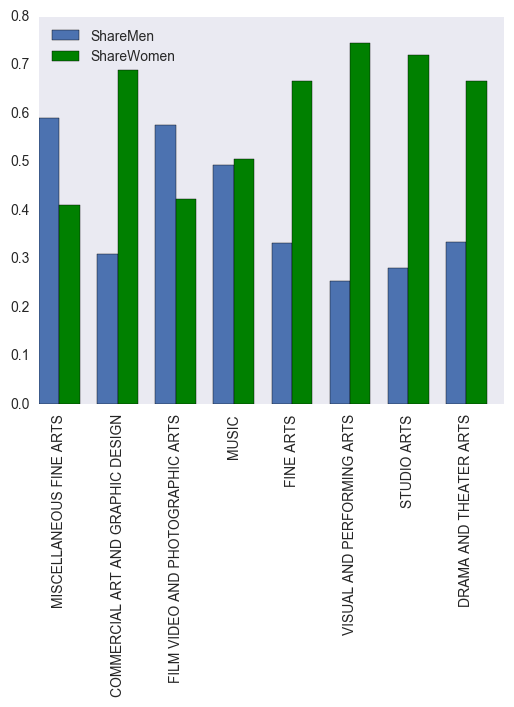

In [51]:
import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts=recent_grads[recent_grads["Major_category"]=="Arts"]

# Create figure instance and subplot
fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

men_proportions = arts["ShareMen"].tolist()
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

## Part 2

# Each value offset by `0.35`
offset_locs = locs + width

# Set of bars for `ShareWomen`
bar_2 = ax1_rg2.bar(offset_locs, women_proportions, width, color="green")

# Align x labels with bars better
ax1_rg2.set_xticks(offset_locs)
ax1_rg2.set_xticklabels(major_names, rotation=90)

# Create a legend
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")

# Display the background grid
plt.grid()
plt.show()

plt.show()